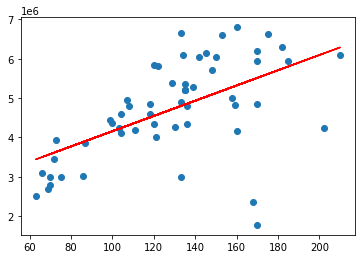

In [32]:
#a
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

houses = pd.read_csv("data_assignment2.csv").set_index('ID')

#Clean NaN
houses = houses.dropna(subset=['Living_area','Selling_price'])
houses = houses.fillna(0) #Biarea only

#houses.plot.scatter(x='Living_area', y='Selling_price')

X = houses.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = houses.iloc[:, 5].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

# b

In [25]:
linear_regressor.intercept_

array([2220603.24335587])

In [29]:
linear_regressor.coef_

array([[19370.13854733]])

# c

In [37]:
print(f"100: {linear_regressor.predict([[100]])[0][0]} 150: {linear_regressor.predict([[150]])[0][0]} 200: {linear_regressor.predict([[200]])[0][0]}")

100: 4157617.0980890268 150: 5126124.025455605 200: 6094630.952822184


# d

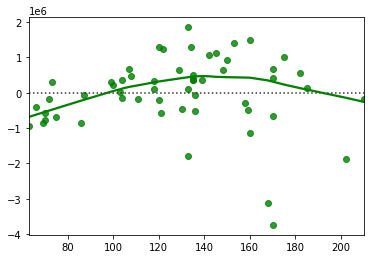

In [42]:
import seaborn as sns

# Plot the residuals after fitting a linear model
sns.residplot(x=X, y=Y, lowess=True, color="g")

# e 

x^2 term ser ut att behövas från residual ploten

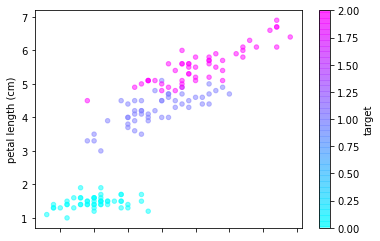

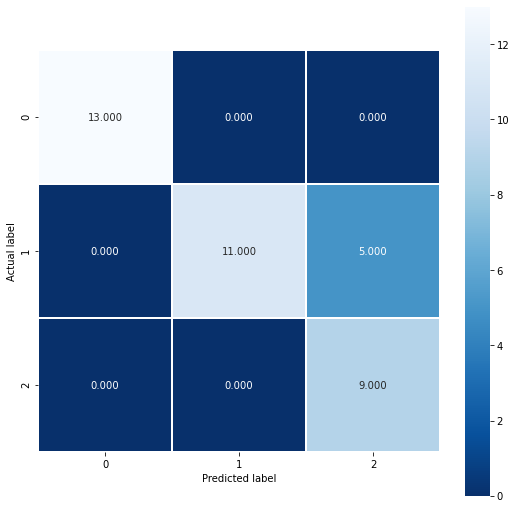

In [108]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

iris = load_iris() 
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                    columns= iris['feature_names'] + ['target'])

iris_df.plot.scatter(x="sepal length (cm)",y="petal length (cm)", c="target", cmap="cool", alpha=0.5)
plt.show()

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)

logisticRegr = LogisticRegression(multi_class='ovr', solver='liblinear')

logisticRegr.fit(x_train, y_train)
logisticRegr.score(x_test, y_test)

pred = logisticRegr.predict(x_test)

cm = metrics.confusion_matrix(y_test, pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');


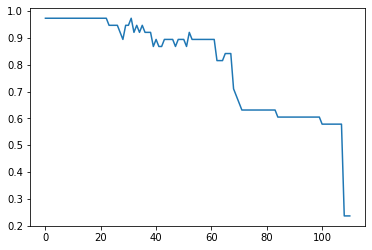

In [136]:
from sklearn.neighbors import KNeighborsClassifier

scores = []
for k in range(1,len(x_train)):
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k) #k=1,3,21

    #Train the model using the training sets
    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)

    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(scores)

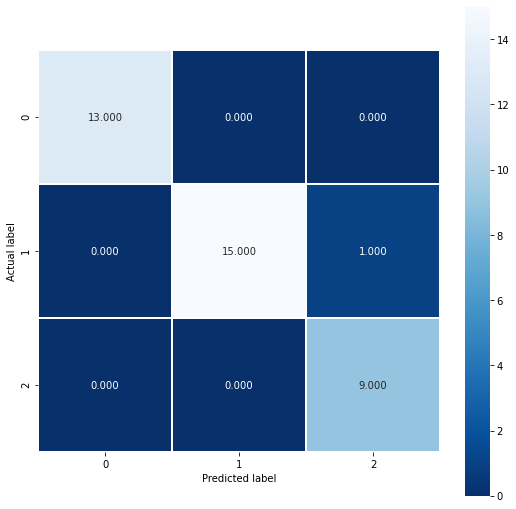

In [138]:
knn = KNeighborsClassifier(n_neighbors=1) #k=1,3,21

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');